### Assignment: EDA on Google Play Store Dataset

This assignment will help you explore and analyze the dataset to gain insights about apps on the Google Play Store. Follow the steps below to perform Exploratory Data Analysis (EDA).

---

#### **1. Data Cleaning**
- Handle missing values in the dataset. Use appropriate imputation methods or remove rows/columns if necessary.
- Clean and transform the `Size` column into numeric format.
- Remove unnecessary symbols (e.g., "+", ",") from the `Installs` column and convert it into numeric.
- Standardize the `Price` column by removing symbols (e.g., "$") and converting it into numeric.
- Convert the `Last Updated` column into a datetime format.

---

#### **2. Descriptive Statistics**
- Calculate summary statistics for numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, etc.).
- Find the number of unique app categories in the `Category` column.
- Calculate the average rating for each category.

---

#### **3. Data Visualization**
1. **Univariate Analysis**:
   - Plot the distribution of `Rating` using histograms or density plots.
   - Visualize the distribution of `Category` using a bar chart.

2. **Bivariate Analysis**:
   - Plot `Size` vs. `Rating` using a scatterplot to see if app size affects ratings.
   - Plot `Reviews` vs. `Installs` to explore their relationship.

3. **Multivariate Analysis**:
   - Use a heatmap to visualize the correlation matrix for numerical columns (`Rating`, `Reviews`, `Installs`, `Size`).

---

#### **4. Advanced Analysis**
- Find the top 10 most reviewed apps in the dataset and analyze their ratings and installs.
- Analyze trends in average `Rating` or `Installs` over time using the `Last Updated` column.
- Determine which categories have the highest average installs and discuss potential reasons.

---

#### **Deliverables**
- A detailed notebook or report containing:
  1. **Data cleaning steps** (explain any assumptions or decisions).
  2. **Insights from descriptive statistics**.
  3. **Visualizations** for key relationships and distributions.
  4. **Answers to specific analysis questions** (e.g., "Do larger apps have higher ratings?").
  5. **Summary of key findings and observations**.

Good luck with your analysis! Let me know if you'd like additional guidance on any specific part.

In [ ]:
# 1. Data Cleaning
# Handle missing values in the dataset. Use appropriate imputation methods or remove rows/columns if necessary.
# Clean and transform the Size column into numeric format.
# Remove unnecessary symbols (e.g., "+", ",") from the Installs column and convert it into numeric.
# Standardize the Price column by removing symbols (e.g., "$") and converting it into numeric.
# Convert the Last Updated column into a datetime format.



In [ ]:


# df['Price'] = df['Price'].apply(process_price)
# df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# df['Price'].fillna(df['Price'].mean(), inplace=True)

# df['Price'].plot(kind='hist')
# gig,axes = plt.subplots(2,2,figsize=(10,10))
# columns = df.select_dtypes(include=['number'])
# df['Reviews'] = df['Reviews'].astype(float)
# df['Size'] = df['Size'].astype(float)
# df['Installs'] = df['Installs'].astype(float)
# df['Price'] = df['Price'].str.replace('$','').astype(float)
# df['Reviews'] = df['Reviews'].astype(float)

# df['Price'].plot(kind='hist',ax=axes[0,0])
# for i in range(1,len(df.columns+1)):
    # sns.histplot(df[df.columns[i]],ax=axes[i//2,i%2])
# sns.histplot(df['Rating'],kde=True)
# sns.boxplot(df['Rating'])
# plt.show()

In [ ]:
# df.info()

In [ ]:
!pip3 install pandas-profiling pydantic-settings

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4e148d10f560da1a13fd5ea7558365e52a11a5394eb6ebab510b9c83f079dd1b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msn
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
# Optional sklearn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, PowerTransformer\
, RobustScaler, QuantileTransformer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import warnings
# from ydantic_settings import BaseSettings

warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/svgoudar/datasets/refs/heads/main/googleplaystore.csv')

#### **1. Data Cleaning**
- Handle missing values in the dataset. Use appropriate imputation methods or remove rows/columns if necessary.
- Clean and transform the `Size` column into numeric format.
- Remove unnecessary symbols (e.g., "+", ",") from the `Installs` column and convert it into numeric.
- Standardize the `Price` column by removing symbols (e.g., "$") and converting it into numeric.
- Convert the `Last Updated` column into a datetime format.

**Handle missing values in the dataset. Use appropriate imputation methods or remove rows/columns if necessary.**

---



In [ ]:
print(df.isnull().sum())
print("--------------------------------")
df.info()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  L

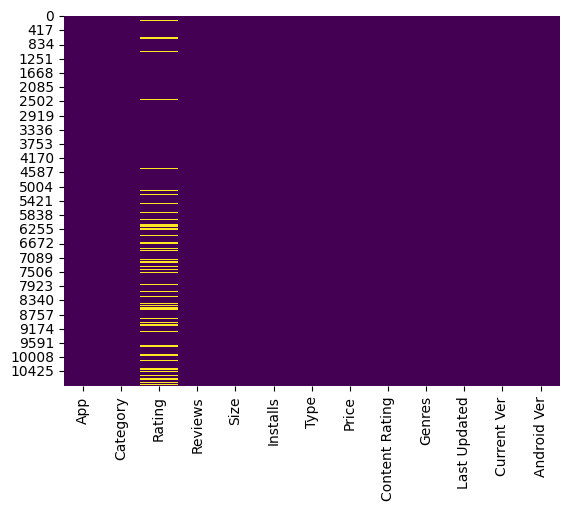

In [ ]:
sns.heatmap(df.isna(), cbar=False,cmap='viridis')
plt.show()

In [ ]:
def process_price(price):
  if price == "Everyone":
    return price
  else:
    return re.sub(r"[^\d]", "", price)
df['Size'] = df['Size'].apply(process_price)
df.drop_duplicates()
df = df[df['Size'] != '']
df['Size'].astype(float)

,Size
0,19.0
1,14.0
2,87.0
3,25.0
4,28.0
...,...
10835,96.0
10836,53.0
10837,36.0
10838,95.0


In [ ]:
# df.isnull().sum()
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


In [ ]:
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9146 non-null   object 
 1   Category        9146 non-null   object 
 2   Rating          9146 non-null   float64
 3   Reviews         9146 non-null   object 
 4   Size            9146 non-null   object 
 5   Installs        9146 non-null   object 
 6   Type            9146 non-null   object 
 7   Price           9146 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9146 non-null   object 
 10  Last Updated    9146 non-null   object 
 11  Current Ver     9138 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1000.3+ KB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs']
# for item in chars_to_remove:
#     for cols in cols_to_clean:
#         df[cols]=df[cols].str.replace(item,'')
# df['Installs'] = df['Installs'].astype(int)

# df['Rating'] = df['Rating'].astype(float).round(2)
# df['Reviews'] = df['Reviews'].astype(int)
# df['Size'] = df['Size'].astype(int)
# df['Price'] = df['Price'].astype(float)
# df.Installs.unique()
df.info()
# df.head()
# df_new = df.copy()
# df_new.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9146 non-null   object 
 1   Category        9146 non-null   object 
 2   Rating          9146 non-null   float64
 3   Reviews         9146 non-null   object 
 4   Size            9146 non-null   object 
 5   Installs        9146 non-null   object 
 6   Type            9146 non-null   object 
 7   Price           9146 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9146 non-null   object 
 10  Last Updated    9146 non-null   object 
 11  Current Ver     9138 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1000.3+ KB


In [ ]:
# df['Last Updated'] = pd.to_datetime(df['Last Updated'])
# df["Last Updated Date"] = df['Last Updated'].dt.date
# df["Last Updated Time"] = df['Last Updated'].dt.time
# df.drop('Last Updated',axis=1,inplace=True)
# df.drop('Last Updated Time',axis=1,inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,87,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,28,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.119919,0,96,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,36,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.184259,3,95,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [ ]:
# Drop rows with empty strings in any column
# df = df[(df != '').all(axis=1)]
# Drop columns with any empty strings
# df = df.loc[:, (df != '').all(axis=0)]
# df.loc[:, (df == '').all()]

# df[(df != '').all(axis=1)]
# df.loc[:, (df != '').all(axis=0)]
# df.query('Size == ""')
# df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
# df['Size'].fillna(df['Size'].mean(), inplace=True)
# df.loc[ :,(df == '').any(axis=0)].columns
# df.loc[(df == 'Floor Plan Creator').any(axis=1)]
# df[~df['Current Ver'].isnull()]
# df['Current Ver'].mode()
# df.fillna({'Current Ver':df['Current Ver'].mode()[0]}, inplace=True)
# df[~df['Android Ver'].isnull()]
# df.fillna({'Android Ver':df['Android Ver'].mode()[0]}, inplace=True)
# df['Android Ver'].mode()
# df[~df['Content Rating'].isnull()]
# df[df['Content Rating'].isnull()]
# df_num = df.select_dtypes(include=['number'])
# df_num['Price'].unique()
# Example with KNN Imputer
# df_num.isnull().sum()
# df_num[df_num['Rating'].isnull()]
# df_num.loc[df_num.isnull().all(axis=1)]
# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
# df_imputed.head()
# sns.scatterplot(data=df_num,)
# [df[i].dtype for i in df.columns]
# df.isnull().sum()
# df.fillna({'Content Rating':df["Content Rating"].mode()[0]},inplace=True)
# df.drop({'Current Ver':df["Current Ver"].mode()[0]},inplace=True)
# df.drop({'Android Ver':df["Android Ver"].mode()[0]},inplace=True
# fig,axes = plt.subplots(4,2,figsize=(15,15))
# df['Rating'].plot(kind='hist',bins=20,ax=axes[0,0])
# df['Rating'].plot(kind='line',ax=axes[0,1])
# df['Rating'].plot(kind='bar',ax=axes[1,0])
# df['Rating'].plot(kind='barh',ax=axes[1,1])
# df['Rating'].plot(kind='box',ax=axes[2,0])
# df['Rating'].plot(kind='density',ax=axes[2,1])
# df['Rating'].plot(kind='kde',ax=axes[3,0])

# df['Reviews'].plot(kind='hist',bins=20,ax=axes[1,0])
# df['Reviews'].plot(kind='line',ax=axes[1,1])
# df.groupby('Category')['Rating'].transform('mean')
# df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))
# df.drop_duplicates(inplace=True)
# df.dropna(subset='Type',inplace=True)
# df[df['Type'].isnull()]
# df.loc[ :,(df == '').any(axis=0)].columns
# df.loc[:,df['Current Ver'].isnull().all(axis=0)]

# df.iloc[0:2,0:3]
# missing_percentage = (df.isnull().sum() / len(df)) * 100
# print(missing_percentage)
# df.dropna(subset=['Current Ver','Android Ver'],inplace=True)
# sns.heatmap(df.describe().T,cmap='coolwarm',annot=True,fmt=".2f")
# plt.show()

# sns.kdeplot(df['Price'].value_counts())

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,1
Genres,0


#### **2. Descriptive Statistics**
- Calculate summary statistics for numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, etc.).
- Find the number of unique app categories in the `Category` column.
- Calculate the average rating for each category.

In [ ]:
# -Calculate summary statistics for numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, etc.).
# df[['Rating','Reviews','Size','Installs']]
# 1.
# df[['Rating','Reviews','Size','Installs']].describe(include='all')

#2.
df['Category'].unique()
df['Category'].nunique()

# #3.
# df.groupby('Category')['Rating'].mean()
# #

34

#### **3. Data Visualization**
1. **Univariate Analysis**:
   - Plot the distribution of `Rating` using histograms or density plots.
   - Visualize the distribution of `Category` using a bar chart.

2. **Bivariate Analysis**:
   - Plot `Size` vs. `Rating` using a scatterplot to see if app size affects ratings.
   - Plot `Reviews` vs. `Installs` to explore their relationship.

3. **Multivariate Analysis**:
   - Use a heatmap to visualize the correlation matrix for numerical columns (`Rating`, `Reviews`, `Installs`, `Size`).

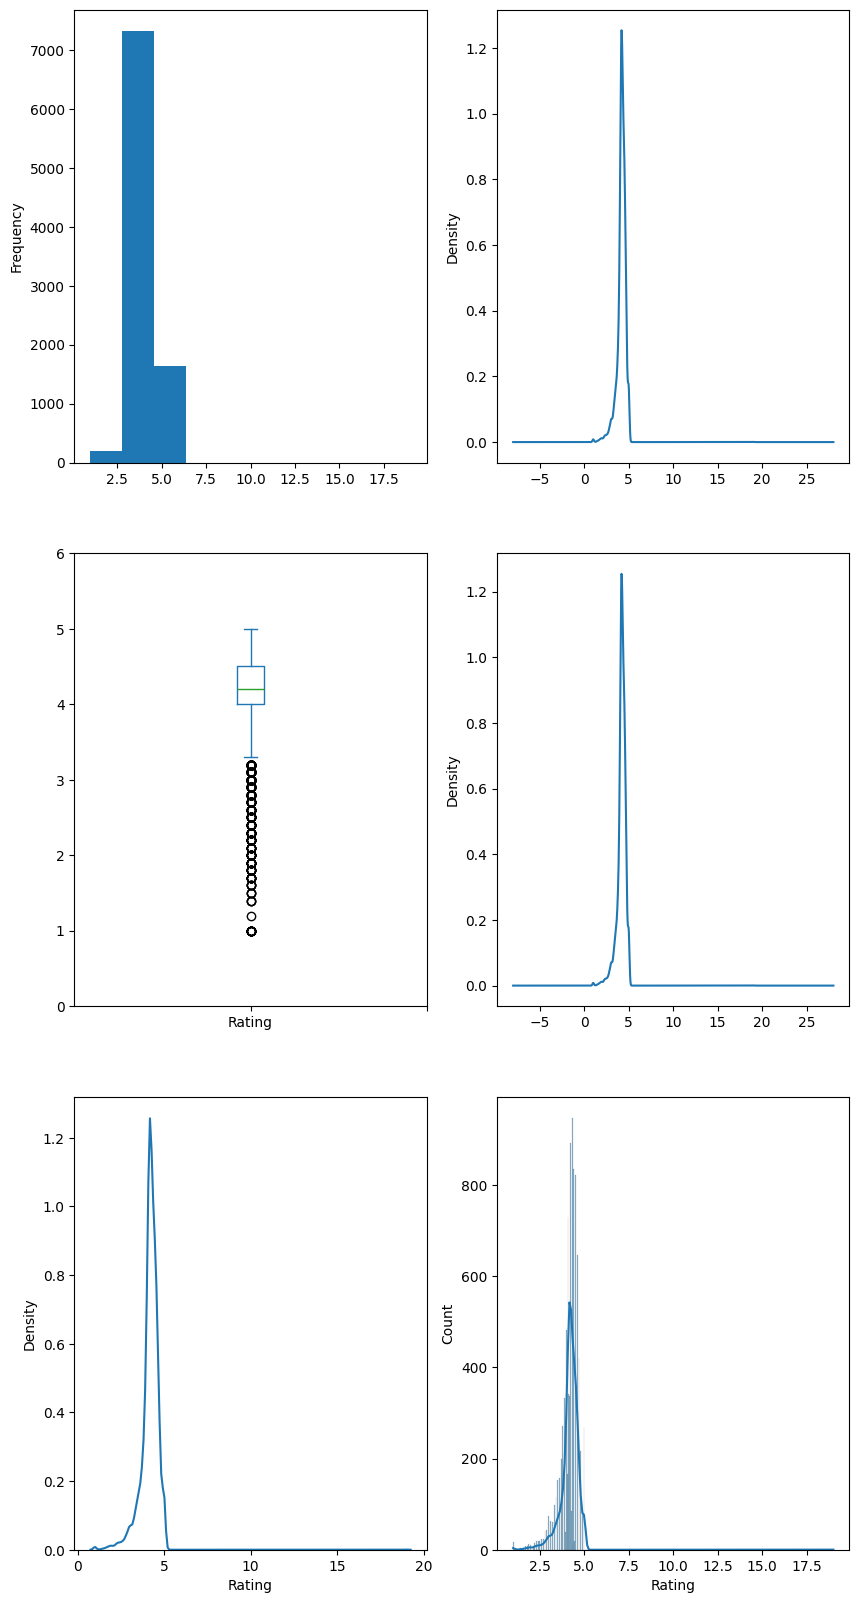

In [28]:
# 1.a
splt,axes = plt.subplots(3,2,figsize=(10,20))

df['Rating'].plot(kind='hist',ax=axes[0,0])
df['Rating'].plot(kind='kde',ax=axes[0,1])
df['Rating'].plot(kind='box',ax=axes[1,0],xlim=(0,2),ylim=(0,6),xticks=range(1,6))
df['Rating'].plot(kind='density',ax=axes[1,1])
sns.kdeplot(df['Rating'],ax=axes[2,0])
sns.histplot(df['Rating'],ax=axes[2,1],kde=True)
plt.show()

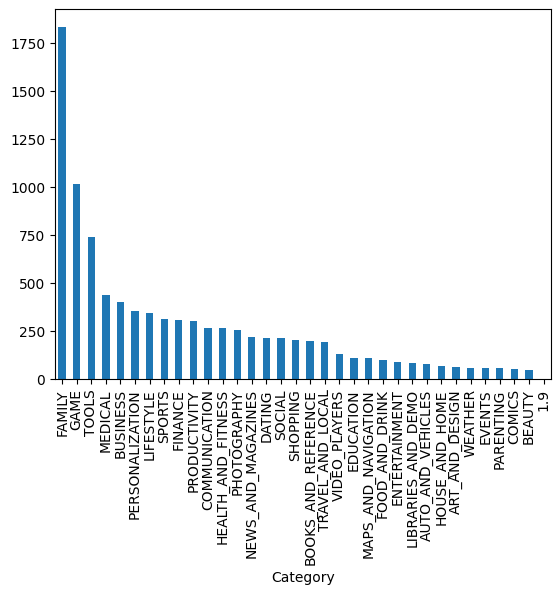

In [ ]:
# 2.a

df['Category'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
splt,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='Size',y='Rating',hue='Size',ax=axes[0])
sns.scatterplot(data=df,x='Reviews',y='Installs',hue='Reviews',ax=axes[1])
# df.Installs
# sns.barplot(data=df,x='Category',y='Reviews',hue='Category',ax=axes[0,1])
plt.show()

In [ ]:
# Create subsets for Paid and Free apps
free_apps = df[df['Type'] == 'Free']
paid_apps = df[df['Type'] == 'Paid']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # 1 row, 2 columns, sharing the y-axis

# Visualization: Size vs Rating for Free Apps
sns.scatterplot(data=free_apps, x='Size', y='Rating', hue='Size', palette='cool', size='Size', sizes=(20, 200), ax=axes[0])
axes[0].set_title('Size vs Rating for Free Apps', fontsize=14)
axes[0].set_xlabel('Size (MB)', fontsize=12)
axes[0].set_ylabel('Rating', fontsize=12)
axes[0].legend(title='Size', loc='best')

# Visualization: Size vs Rating for Paid Apps
sns.scatterplot(data=paid_apps, x='Size', y='Rating', hue='Size', palette='cool', size='Size', sizes=(20, 200), ax=axes[1])
axes[1].set_title('Size vs Rating for Paid Apps', fontsize=14)
axes[1].set_xlabel('Size (MB)', fontsize=12)
axes[1].set_ylabel('')  # Avoid duplicating the y-label

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group data by Category and calculate average Size and Rating
category_data = df.groupby('Category')[['Size', 'Rating']].mean().reset_index()

# Sort by Size to make visualization clearer
category_data = category_data.sort_values('Size', ascending=False)

# Visualization
plt.figure(figsize=(15, 8))
sns.barplot(x='Size', y='Category', data=category_data, palette='viridis')
plt.title('Average App Size by Category', fontsize=16)
plt.xlabel('Average Size (MB)', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Rating', y='Category', data=category_data, palette='coolwarm')
plt.title('Average Rating by Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


In [ ]:
df.head()

In [ ]:
df.set_index('Category',append=True,drop=True,inplace=True)
# df.head()
df.groupby('Category')[['Size', 'Rating']].mean().reset_index()